In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt

1. Welke bron je gebruikt voor het ophalen van prijzen?<br>
bg.fuelo.net<br>
www.tankje.nl<br>
www.tinq.nl

2. Hoe je de data ophaalt (API, scraper, open data, andere bron)<br>
 wordt opgehaald met web scrapers

3. Hoe je de data opschoont<br>
Data wordt opgeschoond door het filteren van de pagina's.<br>
Daarna wordt alle tekst eromheen weggehaald door stript en replace.<br>
Als laatste wordt alles verwerkt in een csv bestand voor grafieken en tabellen te maken.

4. Bepaal voor elk van de drie Vissers-stations 3–5 concurrerende stations binnen een logische
afstand <br>

Tinq is gekozen omdat hun de prijzen op hun eigen website hebben staan.<br>
Daarnaast is gekeken naar tankstations die in de buurt zitten waarvan een derde partij data heeft over de prijzen aangezien deze niet beschikbaar is op andere manieren.

In [2]:
#Esso Vissers Horst

#Texaco horst - https://bg.fuelo.net/gasstation/id/38090?lang=bg
#BP Express Sevenum - https://www.tankje.nl/GasStation/Details/2445
#TinQ Venray Henri Dunanstraat - https://www.tinq.nl/tankstations/venray-henri-dunantstraat#default

In [3]:
#BP Vissers Afferden
#Tango druten - https://www.brandstof-zoeker.nl/station/tango-druten-8931/
#TinQ druten - https://www.tinq.nl/tankstations/druten-industrieweg#default
#TinQ Winssen - Leegstraat - https://www.tinq.nl/tankstations/winssen-leegstraat#default
#TinQ Megen - Noord zuid - https://www.tinq.nl/tankstations/megen-noord-zuid#default

In [4]:
#Esso Vissers Bergh Noord
#shell babberich - https://bg.fuelo.net/gasstation/id/37998
#Kuster energy - https://www.tankje.nl/GasStation/Details/2587
#TinQ zevenaar - https://www.tinq.nl/tankstations/zevenaar-edisonstraat#default
#TinQ Millingen aan de Rijn - https://www.tinq.nl/tankstations/millingen-aan-de-rijn-heerbaan#default


In [5]:
urls = [['Texaco horst','https://bg.fuelo.net/gasstation/id/38090?lang=bg','Esso Vissers Horst'],
        ['BP Express Sevenum','https://www.tankje.nl/GasStation/Details/2445','Esso Vissers Horst'],
        ['TinQ Venray Henri Dunanstraat','https://www.tinq.nl/tankstations/venray-henri-dunantstraat#default','Esso Vissers Horst'],
        ['TinQ druten','https://www.tinq.nl/tankstations/druten-industrieweg#default','BP Vissers Afferden'],
        ['TinQ Winssen - Leegstraat','https://www.tinq.nl/tankstations/winssen-leegstraat#default','BP Vissers Afferden'],
        ['TinQ Megen - Noord zuid','https://www.tinq.nl/tankstations/megen-noord-zuid#default','BP Vissers Afferden'],
        ['shell babberich','https://bg.fuelo.net/gasstation/id/37998','Esso Vissers Bergh Noord'],
        ['Kuster energy','https://www.tankje.nl/GasStation/Details/2587','Esso Vissers Bergh Noord'],
        ['TinQ zevenaar','https://www.tinq.nl/tankstations/zevenaar-edisonstraat#default','Esso Vissers Bergh Noord'],
        ['TinQ Millingen aan de Rijn','https://www.tinq.nl/tankstations/millingen-aan-de-rijn-heerbaan#default','Esso Vissers Bergh Noord']
        ]

In [6]:
#Tinq
def Get_Tinq_Data(url):
    """
    Main function for getting data of fuel prices from TinQ.
    """
    page = requests.get(url=url)
    soup = BeautifulSoup(page.text,'html')
    fuel_names = Get_Fuel_Names_Tinq(soup=soup)
    fuel_prices = Get_Fuel_Prices_Tinq(soup=soup)
    return fuel_names,fuel_prices
    
def Get_Fuel_Names_Tinq(soup):
    """
    Get all fuel names that are at the Tinq stations.
    """
    benzine_soort = soup.find_all('div',class_='field field--name-taxonomy-term-title field--type-ds field--label-hidden field__item')
    benzine_namen = [benzine.text for benzine in benzine_soort]
    cleaned_benzine_namen = []
    
    for benzine in benzine_namen:
        benzine = benzine.replace('\n','').strip()
        cleaned_benzine_namen.append(benzine)
        
    return cleaned_benzine_namen

def Get_Fuel_Prices_Tinq(soup):
    """
    Get all prices of the fuel the station has.
    """
    prijzen = soup.find_all('div',class_='field field--name-field-prices-price-pump field--type-float field--label-hidden field__item')
    prijzen_lijst = [prijs.text for prijs in prijzen]
    cleaned_prijzen_namen = []
    for prijs in prijzen_lijst:
        prijs = prijs.replace('\n','').replace('/L','').replace('EUR','').replace('€ ','').strip()
        cleaned_prijzen_namen.append(prijs)
        
    return cleaned_prijzen_namen

In [7]:
#fuelo
def Get_Fuelo_Data(url):
    """
    Main function for getting data of fuel prices from Fuelo.
    """
    headers = {"Accept-Language": "en-US,en;q=0.5"}
    page = requests.get(url=url,headers=headers)
    soup = BeautifulSoup(page.text,'html')
    prices = Get_Fuel_Prices_Fuelo(soup=soup)
    fuel_names = Get_Fuel_Names_Fuelo(soup=soup) 
    return fuel_names,prices

def Get_Fuel_Prices_Fuelo(soup):
    """
    Get all prices of the fuel the station has.
    """
    prijzen = soup.find_all('span',itemprop='price')
    prices = []
    for x in prijzen:
        prices.append(x.text.strip())  
    return prices

def Get_Fuel_Names_Fuelo(soup):
    """
    Get all fuel names that are at the Tinq stations.
    """
    brandstoffen = soup.find_all('td',itemprop='name')
    brandstoffen_Cleaned = []
    for y in brandstoffen:
        brandstoffen_Cleaned.append(y.text.strip())
    return brandstoffen_Cleaned

In [8]:
#Tankje
def Get_Tankje_Data(url):
    """
    Main function for getting data of fuel prices from Tankje.
    """
    page = requests.get(url=url)
    soup = BeautifulSoup(page.text,'html')
    prices = Get_Fuel_Prices_Tankje(soup=soup)
    fuel_names = Get_Fuel_Names_Tankje(soup=soup) 
    return fuel_names,prices

def Get_Fuel_Prices_Tankje(soup):
    """
    Get all prices of the fuel the station has.
    """
    prijzen = soup.find_all('div',class_='h3 text-danger mb-2')
    prices = []
    for x in prijzen:
        prices.append(x.text.replace('€ ','').strip())  
    return prices

def Get_Fuel_Names_Tankje(soup):
    """
    Get all fuel names that are at the Tinq stations.
    """
    brandstoffen = soup.find_all('h4',class_='h6 mb-0')
    brandstoffen_Cleaned = []
    for y in brandstoffen:
        brandstoffen_Cleaned.append(y.text.strip())
    return brandstoffen_Cleaned

In [9]:
def Safe_To_File(row):
    for x in range(len(row[4])):
        df_new = pd.DataFrame([[row[0],row[1],row[2],row[3][x],row[4][x],row[5]]])
        df_new.to_csv("tank_data.csv", mode="a", header=False, index=False)

    

In [10]:
def get_Data():
    for url in urls:
        new_row = []
        if 'fuelo' in url[1]:
            fuel,price = Get_Fuelo_Data(url[1])
        elif 'tankje' in url[1]:
            fuel,price = Get_Tankje_Data(url[1])
        elif 'tinq' in url[1]:
            fuel,price = Get_Tinq_Data(url[1])
        new_row.append(url[0])
        new_row.append(url[1])
        new_row.append(url[2])
        new_row.append(fuel)
        new_row.append(price)
        new_row.append(datetime.datetime.today().strftime('%Y-%m-%d'))
        Safe_To_File(new_row)
        
get_Data()

In [11]:
df = pd.read_csv('tank_data.csv')
df

,Naam,URL,koppelbedrijf,brandstof,prijs,datum
0,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,Euro 95,"2,104",2025-12-05
1,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,Diesel,"1,988",2025-12-05
2,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,LPG,"0,781",2025-12-05
3,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,Diesel Premium,"0,000",2025-12-05
4,BP Express Sevenum,https://www.tankje.nl/GasStation/Details/2445,Esso Vissers Horst,Euro 95 (E10),"1,97",2025-12-05
...,...,...,...,...,...,...
123,TinQ Millingen aan de Rijn,https://www.tinq.nl/tankstations/millingen-aan...,Esso Vissers Bergh Noord,Superplus 98 E5,2.129,2025-12-11
124,TinQ Millingen aan de Rijn,https://www.tinq.nl/tankstations/millingen-aan...,Esso Vissers Bergh Noord,Diesel B7,1.599,2025-12-11
125,TinQ Millingen aan de Rijn,https://www.tinq.nl/tankstations/millingen-aan...,Esso Vissers Bergh Noord,LPG,0.749,2025-12-11
126,TinQ Millingen aan de Rijn,https://www.tinq.nl/tankstations/millingen-aan...,Esso Vissers Bergh Noord,Euro95 E10,1.839,2025-12-11


In [25]:
df.head(50)

,Naam,URL,koppelbedrijf,brandstof,prijs,datum
0,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,Euro 95,"2,104",2025-12-05
1,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,Diesel,"1,988",2025-12-05
2,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,LPG,"0,781",2025-12-05
3,Texaco horst,https://bg.fuelo.net/gasstation/id/38090?lang=bg,Esso Vissers Horst,Diesel Premium,"0,000",2025-12-05
4,BP Express Sevenum,https://www.tankje.nl/GasStation/Details/2445,Esso Vissers Horst,Euro 95 (E10),"1,97",2025-12-05
5,BP Express Sevenum,https://www.tankje.nl/GasStation/Details/2445,Esso Vissers Horst,Diesel (B7),"1,75",2025-12-05
6,TinQ Venray Henri Dunanstraat,https://www.tinq.nl/tankstations/venray-henri-...,Esso Vissers Horst,Diesel B7,1.569,2025-12-05
7,TinQ Venray Henri Dunanstraat,https://www.tinq.nl/tankstations/venray-henri-...,Esso Vissers Horst,Euro95 E10,1.769,2025-12-05
8,TinQ druten,https://www.tinq.nl/tankstations/druten-indust...,BP Vissers Afferden,Diesel B7,1.629,2025-12-05
9,TinQ druten,https://www.tinq.nl/tankstations/druten-indust...,BP Vissers Afferden,Euro95 E10,1.849,2025-12-05


In [32]:
df.prijs,str.replace('\n','')

TypeError: replace expected at least 2 arguments, got 1

5. Maak een eenvoudige vergelijking (grafiek/tabel) van deze stations

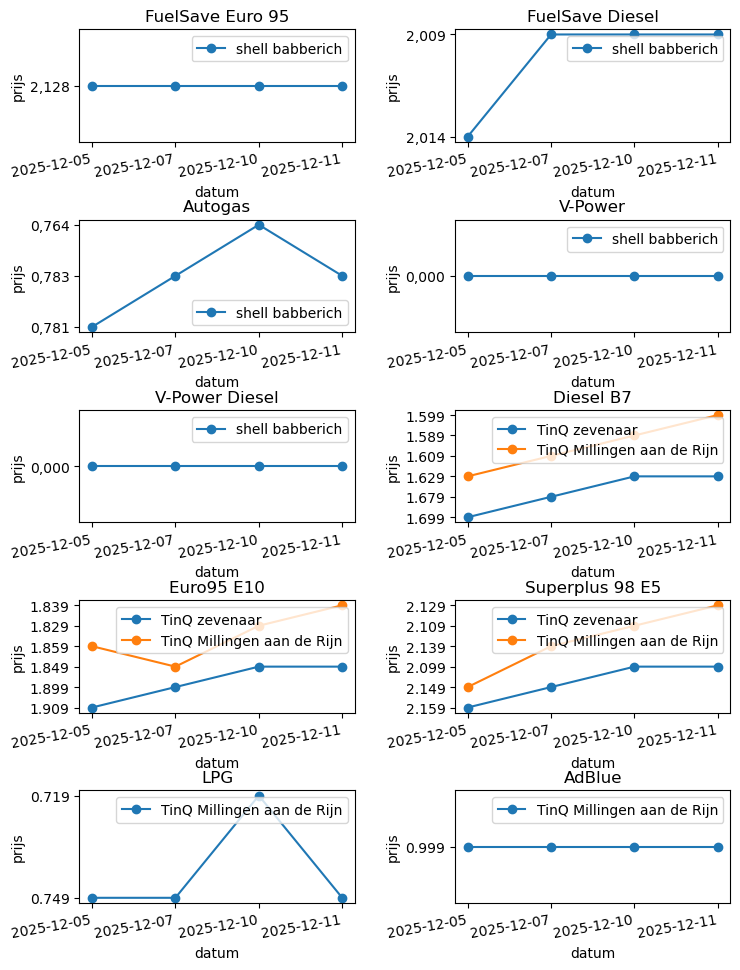

In [75]:
#Esso Vissers Horst
df_horst = df[df['koppelbedrijf'] == 'Esso Vissers Bergh Noord']
fuels = df_horst.brandstof.unique()
fig, axs = plt.subplots(5,2,figsize=(8,10))
fig.tight_layout(pad=3.5)  
i = 0
for x in range(0,5):
    for y in range(0,2):
        df_fuel = df_horst[df_horst['brandstof']== fuels[i]]
        for station in df_fuel.Naam.unique():
            df_station = df_fuel[df_fuel['Naam'] == station]
            axs[x, y].plot(df_station.datum, df_station.prijs, label=station, marker='o')
        axs[x, y].set_title(fuels[i])
        axs[x, y].set_xlabel('datum')
        axs[x, y].set_ylabel('prijs')
        axs[x, y].legend()

        i = i + 1
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=10, ha='right')
plt.show()

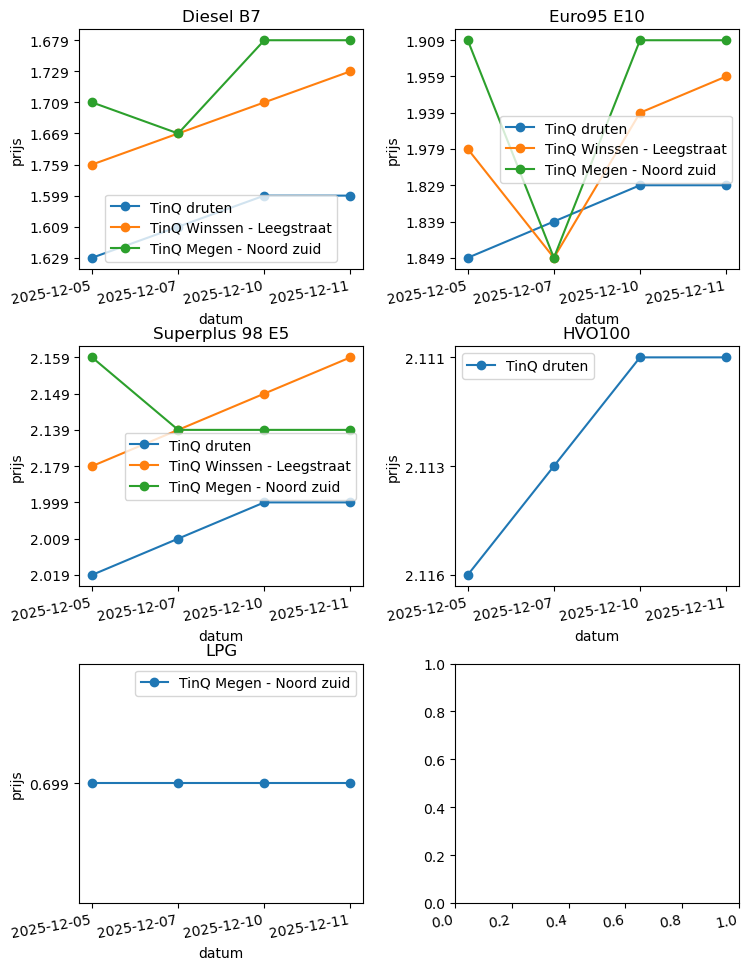

In [72]:
#
df_afferden = df[df['koppelbedrijf'] == 'BP Vissers Afferden']
fuels = df_afferden.brandstof.unique()
fig, axs = plt.subplots(3,2,figsize=(8,10))
fig.tight_layout(pad=3.5)  
i = 0
for x in range(0,3):
    for y in range(0,2):
        if i != 5:
            df_fuel = df_afferden[df_afferden['brandstof']== fuels[i]]
            for station in df_fuel.Naam.unique():
                df_station = df_fuel[df_fuel['Naam'] == station]
                axs[x, y].plot(df_station.datum, df_station.prijs, label=station, marker='o')
            axs[x, y].set_title(fuels[i])
            axs[x, y].set_xlabel('datum')
            axs[x, y].set_ylabel('prijs')
            axs[x, y].legend()

        
        i = i + 1
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=10, ha='right')
plt.show()

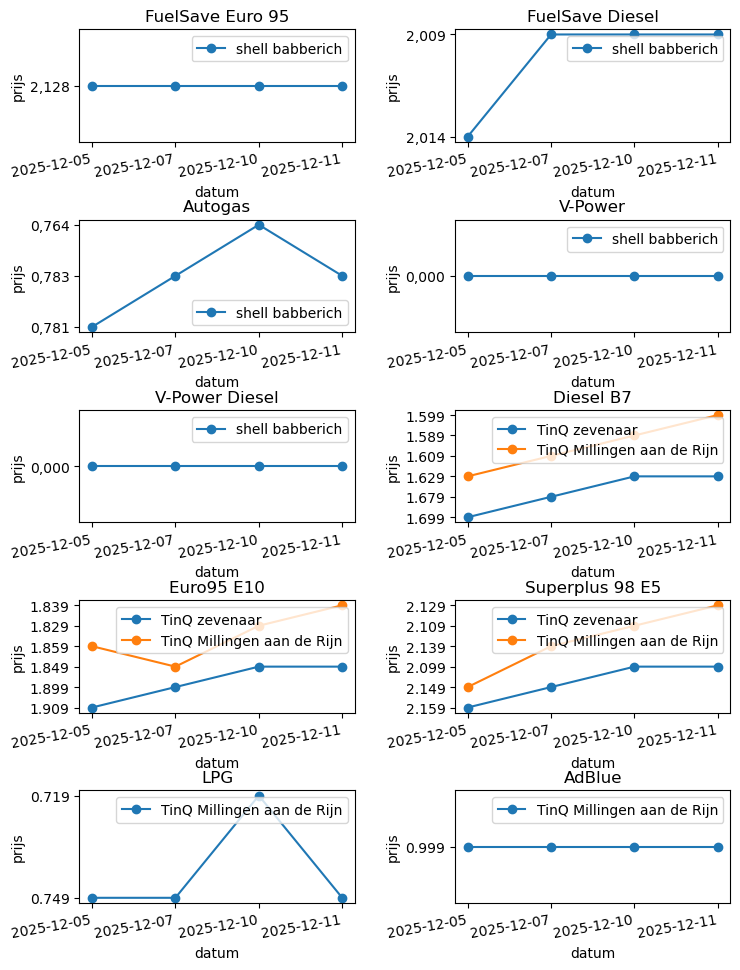

In [ ]:
#Esso Vissers Bergh Noord
df_bergh = df[df['koppelbedrijf'] == 'Esso Vissers Bergh Noord']
fuels = df_bergh.brandstof.unique()
fig, axs = plt.subplots(5,2,figsize=(8,10))
fig.tight_layout(pad=3.5)  
i = 0
for x in range(0,5):
    for y in range(0,2):
        df_fuel = df_bergh[df_bergh['brandstof']== fuels[i]]
        for station in df_fuel.Naam.unique():
            df_station = df_fuel[df_fuel['Naam'] == station]
            axs[x, y].plot(df_station.datum, df_station.prijs, label=station, marker='o')
        axs[x, y].set_title(fuels[i])
        axs[x, y].set_xlabel('datum')
        axs[x, y].set_ylabel('prijs')
        axs[x, y].legend()
        i = i + 1
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=10, ha='right')

6. Geef aan welke beperkingen je bent tegengekomen en welke vragen je hebt.<br>

Beperkingen zijn vooral dat veel tankstations hun prijzen niet online hebben staan. Hierdoor is er een grote kans dat de data niet up to date is of dat deze incorrect is.<br>
Een andere beperking is dat niet alle websites scraping toestaan waardoor we nog meer gelimiteerd zijn van waar de data vandaan kan komen.


7. Formuleer korte aanbevelingen voor hoe dit proces geschikter zou worden voor gebruik in
een prijsbepalingsmodel

Om de prijs te bepalen kun je kijken naar hoe sterk de concurrentie is van nabijgelegen tankstations. Op basis daarvan kun je bepalen hoe duur of goedkoop je eigen brandstof moet zijn.<br>
Sommige merken, zoals Tinq, leveren betrouwbaardere prijsgegevens. Daardoor kun je ze meer gewicht geven in de berekening.<br>
Daarnaast speelt de afstand een grote rol:
als een concurrerend tankstation bijvoorbeeld maar 2 kilometer verderop ligt, is het belangrijk dat jouw prijs niet teveel afwijkt van die in de buurt.<br><br>
In de data staat nu geen afstand van de tankstations waardoor iedere tankstation momenteel als evenzwaar meetelt.<br>
